<a href="https://colab.research.google.com/github/kjaitken/git_repo/blob/main/Final_DSI_python_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #2
## Pandas and Visualization





##Metadata Review (3 marks)

What organization publishes this dataset?

- Toronto polling data was published by City Clerk's Office and on the Open Toronto Data site: https://open.toronto.ca/dataset/polls-conducted-by-the-city/

How frequently is the dataset updated?
 - Updates are refreshed daily (during the work week) with the last refresh on Dec. 16, 2022. 

What metadata is available (e.g., column names, data types, descriptions)?
 - The metadata in the columns includes the address, the reason for the poll, minimum number of ballots, % plus number of ballots required for the poll to be legally valid (e.g. 50%+1 ballot). There is also a metadata link through CKAN, which can be retrieved through this package and its resources, the package name is placed in the URL:
url = base_url + "/api/3/action/package_show"
params = { "id": "polls-conducted-by-the-city"}
package = requests.get(url, params = params).json()
 
Is there documentation about who or what produces the data? About who collects it? 
 - The website states that the city clerk's office conducts the polling, but the documentation on the who exactly conducts the polls and collects the data is not clear. There is a link to : https://www.toronto.ca/city-government/planning-development/polls-regarding-changes-in-a-neighbourhood/. Also the README xlsx file does not unfortunately provide any of this information. There is a more involved set of instructions to get the API-sourced dataset, but it is not clear if there is more information available on this route.  

Through what processes? 
 - the polling is conducted on various topics covered by a City by-law (Chp190). There is a suggestion that epolling is sometimes involved, but much of the polling is described as being through mail-in ballots: https://www.toronto.ca/city-government/planning-development/polls-regarding-changes-in-a-neighbourhood/information-regarding-cafe-parking-traffic-polls/


Is there documentation about limitations of the data, such as possible sources of error or omission?
- Not specifically for this dataset, though the city invites users to engage with the open data project. There is a open data contact email however for any questions. 
- It also was not clear if the blank ballots were included in the spoiled ballots section. 

Are there any restrictions concerning data access or use? (e.g.,registraton required or non-commercial use only)
 - No. The city states that: "In accordance with our Open Data Policy and License, you can copy, redistribute, and use the material for any purpose, providing you give appropriate credit, include a link to the license, and indicate if changes were made". https://open.toronto.ca/about/frequently-asked-questions/about-datasets/

##Getting started (3 marks)

Load the data to a single DataFrame.
Profile the DataFrame.
What are the column names?
What are the dtypes when loaded? Do any not make sense?
How many NaNs are in each column?
What is the shape of the DataFrame?
Generate some summary statistics for the data.
For numeric columns: What are the max, min, mean, and median?
For text columns: What is the most common value? How many unique values are there?
Are there any statistics that seem unexpected?
Rename one or more columns in the DataFrame.
Select a single column and find its unique values.
Select a single text/categorical column and find the counts of its values.
Convert the data type of at least one of the columns. If all columns are typed correctly, convert one to str and back.
Write the DataFrame to a different file format than the original.

In [ ]:
#Getting started
#1. Load the data to a single DataFrame.
#importing polling data from open Toronto data polls

from os import read
import pandas as pd
import requests
from urllib.request import urlretrieve
pd.set_option("display.max_columns",None)

url=("https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/7bce9bf4-be5c-4261-af01-abfbc3510309/resource/13c405e8-f884-4950-baf8-07e0f7b0e299/download/Polls%20Data.csv")

urlretrieve(url, 'polls.csv') # this brings the data into your colab working directory

df = pd.read_csv('/content/polls.csv') 


In [ ]:
#Getting started

#2.Profile the DataFrame
#What are the column names? 

for col in df: 
  print(col)

_id
ADDRESS
APPLICATION_FOR
BALLOTS_BLANK
BALLOTS_CAST
BALLOTS_DISTRIBUTED
BALLOTS_IN_FAVOUR
BALLOTS_NEEDED_TO_PROCEED
PERCENT_plus_extra_BALLOTS_NEEDED
BALLOTS_OPPOSED
BALLOTS_RECEIVED_BY_VOTERS
BALLOTS_RETURNED_TO_SENDER
BALLOTS_SPOILED
CLOSE_DATE
DECLARATIONS_ADDED
FINAL_VOTER_COUNT
MORATORIUM_DATE
OPEN_DATE
PASS_RATE
PASS_RATE_LABEL
POLL_CD
POLL_ID
POLL_RESULT
POTENTIAL_VOTERS
RESPONSE_RATE_MET
PERCENT OF BALLOTS NEEDED FOR APPROVAL


In [ ]:
#Getting started
#2.Profile the DataFrame continued 
#What are the dtypes when loaded? 

From the info() below, the dtypes are: float64(1), int64(14), object(10)

df.info()  # info() gives a lot of useful information on columns, their Dtypes, Non-Null counts, and by extension null counts as well. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   _id                            1134 non-null   int64  
 1   ADDRESS                        762 non-null    object 
 2   APPLICATION_FOR                1134 non-null   object 
 3   BALLOTS_BLANK                  1134 non-null   int64  
 4   BALLOTS_CAST                   1134 non-null   int64  
 5   BALLOTS_DISTRIBUTED            1134 non-null   int64  
 6   BALLOTS_IN_FAVOUR              1134 non-null   int64  
 7   BALLOTS_NEEDED_TO_PROCEED      1134 non-null   int64  
 8   BALLOTS_NEEDED_TO_PROCEED_LBL  1134 non-null   object 
 9   BALLOTS_OPPOSED                1134 non-null   int64  
 10  BALLOTS_RECEIVED_BY_VOTERS     1134 non-null   int64  
 11  BALLOTS_RETURNED_TO_SENDER     1134 non-null   int64  
 12  BALLOTS_SPOILED                1134 non-null   i

Getting started

2. Profile the DataFrame continued: 

  
  Do any columns [datatypes?] not make sense? 

- The description in the README for the columns states that "BALLOTS_NEEDED_TO_PROCEED_LBL " is the percentage of ballots received needed to consider a poll valid, but the rows have strings of text as well as numbers in them, for instance row with id 302037 that a percantage as well as 100 may be valid for a poll to be valid. As a result, the datatype is listed as an object, when the data should really be split into two or three columns of numbers for the percent, additional ballots required over the percentage and the minimum number of ballots, where designated.  
- the date should be in a date-time format
- the numbers of blank ballots and the spoiled ballots may be overlapping or shared, but this is not described. 

  
  How many NaNs are in each column? 

- All but two of the columns in the above table are listed as Non-Null, leaving "PASS_RATE" and "ADDRESS" as the only columns with an empty data.  
The column for "PASS_RATE" had 1134-932 = 202 NaNs
The column for "ADDRESS" had 370 NaNs, as of Dec 16, 2022. As this is updated daily, this could change. As a result, the results from today's dataset will be made into a pdf as well as saving the ipynb. 

In [ ]:
mask = newdf.isnull() ### another way to find all the columns that contain NaNs
NaNcol = newdf.columns[mask.any()]
print(NaNcol)

Index(['ADDRESS', 'PASS_RATE'], dtype='object')


In [ ]:
# the shape of the DataFrame
df.shape
#the shape has 1134 and 26 rows and columns respectively. 

(1134, 26)

In [ ]:
#Getting started continued
#3. summary statistics

   # For numeric columns: What are the **max, min, mean, and median**?

   # first collect numeric columns for this analysis

from numpy import dtype
import pandas as pd
import statistics
pd.set_option("display.max_columns",None)

numdf = df.copy() # to ensure original not overwritten
numeric_columns = numdf.select_dtypes(include='number')

In [ ]:
#calculate mean, max, min and median of each column:

for column in numeric_columns: 
  
  minval=numeric_columns.min()
  maxval=numeric_columns.max()
  meanval= numeric_columns.mean()
  medianval=numeric_columns.median()

print(f'\nThe mean values for each column are:\n{meanval}')
print(f'\nThe maximum values for of each column are:\n{maxval}')
print(f'\nThe minimum values of each column are:\n{minval}')
print(f'\nThe median values of each column are:\n{medianval}')


The mean values for each column are:
_id                           304801.500000
BALLOTS_BLANK                      0.047619
BALLOTS_CAST                      46.127866
BALLOTS_DISTRIBUTED              116.220459
BALLOTS_IN_FAVOUR                 31.936508
BALLOTS_NEEDED_TO_PROCEED         36.745150
BALLOTS_OPPOSED                   10.208113
BALLOTS_RECEIVED_BY_VOTERS       108.729277
BALLOTS_RETURNED_TO_SENDER         7.491182
BALLOTS_SPOILED                    3.935626
DECLARATIONS_ADDED                 1.659612
FINAL_VOTER_COUNT                116.220459
PASS_RATE                         23.415236
POLL_ID                          818.113757
POTENTIAL_VOTERS                 265.416226
dtype: float64

The maximum values for of each column are:
_id                           305368.0
BALLOTS_BLANK                      4.0
BALLOTS_CAST                     971.0
BALLOTS_DISTRIBUTED             2424.0
BALLOTS_IN_FAVOUR                536.0
BALLOTS_NEEDED_TO_PROCEED       1038.0
BALLOTS_O

In [ ]:
#3. summary statistics continued: 
#What is the shape of the DataFrame? 
df.shape # shape indicates the (rows, columns)

(1134, 25)

In [ ]:
#Getting started - summary statistics continued: 

#For text columns: What is the **most common value**? 
## REFERENCE: https://pandas.pydata.org/pandas-docs/version/0.19/generated/pandas.DataFrame.mode.html

pd.set_option("display.max_columns",None)
objdf = df.copy() # making sure I don't change the original df 
obj_columns = numdf.select_dtypes(include='object')
obj_columns.mode().iloc[0] ## see reference#

ADDRESS                                            1122 Queen St W
APPLICATION_FOR                                 Front Yard Parking
BALLOTS_NEEDED_TO_PROCEED_LBL    25% of ballots received by voters
CLOSE_DATE                                              2016-02-17
MORATORIUM_DATE                                         2019-11-11
OPEN_DATE                                               2016-01-18
PASS_RATE_LABEL                        50% + 1 of received ballots
POLL_CD                                               BCP 2015-111
POLL_RESULT                                              In Favour
RESPONSE_RATE_MET                                              Yes
Name: 0, dtype: object

In [ ]:
#Getting started - summary statistics continued: 

#How many **unique values** are there?

# use the object-containing df obj_columns from above
uniqobj = obj_columns.nunique()
uniqobj

ADDRESS                           749
APPLICATION_FOR                    10
BALLOTS_NEEDED_TO_PROCEED_LBL       4
CLOSE_DATE                        697
MORATORIUM_DATE                   764
OPEN_DATE                         698
PASS_RATE_LABEL                     3
POLL_CD                          1134
POLL_RESULT                         3
RESPONSE_RATE_MET                   2
dtype: int64

Are there any statistics that seem **unexpected**?

 - it seemed odd that the minimum PASS_RATE was reported as 2.0. As the passrate is defined in the README as the "Number of returned ballots needed for a positive poll result", this seemed like an exceptionally low bar for a poll to pass for further evaluation. Later in this assignment, the reason for this low number became apparent, since NaNs were returned if there was no pass. However from the definition, there should be a calculation even if the polls did not achieve enough voter submissions. The NaNs in the PASS_RATE section when "Response Rate Not Met" are probably an oversight, but the PASS_RATE should still be calculated.  

In [ ]:
#Getting started - summary statistics continued:  

#4. Rename one or more columns in the DataFrame.
df = df.rename(columns={'BALLOTS_NEEDED_TO_PROCEED_LBL':'PERCENT_plus_extra_BALLOTS_NEEDED'}) 
print(list(df)) #checking for the appropriate title change

['_id', 'ADDRESS', 'APPLICATION_FOR', 'BALLOTS_BLANK', 'BALLOTS_CAST', 'BALLOTS_DISTRIBUTED', 'BALLOTS_IN_FAVOUR', 'BALLOTS_NEEDED_TO_PROCEED', 'PERCENT_plus_extra_BALLOTS_NEEDED', 'BALLOTS_OPPOSED', 'BALLOTS_RECEIVED_BY_VOTERS', 'BALLOTS_RETURNED_TO_SENDER', 'BALLOTS_SPOILED', 'CLOSE_DATE', 'DECLARATIONS_ADDED', 'FINAL_VOTER_COUNT', 'MORATORIUM_DATE', 'OPEN_DATE', 'PASS_RATE', 'PASS_RATE_LABEL', 'POLL_CD', 'POLL_ID', 'POLL_RESULT', 'POTENTIAL_VOTERS', 'RESPONSE_RATE_MET', 'PERCENT OF BALLOTS NEEDED FOR APPROVAL']


In [ ]:
#Getting started - summary statistics continued: 

#5. Select a single column and find its unique values. 
#using the nunique method as above and unique, while selecting for the "PERCENT_plus_extra_BALLOTS_NEEDED" column: 

print(f'The number of unique categories of applications is {df["PERCENT_plus_extra_BALLOTS_NEEDED"].nunique()}, while the unique values are: \n\n{df["PERCENT_plus_extra_BALLOTS_NEEDED"].unique()}')


The number of unique categories of applications is 4, while the unique values are: 

['25% of ballots received by voters'
 '50% + 1 of ballots received by voters'
 '30% of ballots received by voters or 100'
 '25% + 1 of ballots received by voters']


In [ ]:
#6. Select a single text/categorical column and find the counts of its values.

counts = df["PERCENT_plus_extra_BALLOTS_NEEDED"].value_counts()
print(counts)

25% of ballots received by voters           898
50% + 1 of ballots received by voters       212
30% of ballots received by voters or 100     13
25% + 1 of ballots received by voters        11
Name: PERCENT_plus_extra_BALLOTS_NEEDED, dtype: int64


In [ ]:
#7. Convert the data type of at least one of the columns. 
#The original datatype of 'object' was seen in the df.info() result earlier in section 2. 
# Here it is converted to the datetime datatype. 

df['OPEN_DATE'] = pd.to_datetime(df['OPEN_DATE'])
df['OPEN_DATE']

0      2015-05-01
1      2015-05-04
2      2015-05-12
3      2015-05-06
4      2015-05-06
          ...    
1129   2022-10-25
1130   2022-10-25
1131   2022-10-26
1132   2022-11-10
1133   2022-11-08
Name: OPEN_DATE, Length: 1134, dtype: datetime64[ns]

In [ ]:
#8. Write the DataFrame to a different file format than the original. The original was a csv. Here it is saved to excel. 
import pandas as pd
from pandas import ExcelWriter

df.to_excel("df_polls.xlsx")  


#More data wrangling, filtering (3 marks)
1. Create a column derived from an existing one. Assign a value based on the value in another column


In [ ]:
#extracting a string from the retitled column'PERCENT_and_NO.BALLOTS_NEEDED', TO 
#I created one column for the percent string but another two for the additional ballot acceptance limitations (+1 or 100 minimum) could added to another column in future. 

df["PERCENT OF BALLOTS NEEDED FOR APPROVAL"]=""

df.loc[df['PERCENT_plus_extra_BALLOTS_NEEDED'].str.contains("25% "), "PERCENT OF BALLOTS NEEDED FOR APPROVAL"]= "25"
df.loc[df['PERCENT_plus_extra_BALLOTS_NEEDED'].str.contains("50% "), "PERCENT OF BALLOTS NEEDED FOR APPROVAL"]= "50"
df.loc[df['PERCENT_plus_extra_BALLOTS_NEEDED'].str.contains("30% "), "PERCENT OF BALLOTS NEEDED FOR APPROVAL"]= "30"

df['PERCENT OF BALLOTS NEEDED FOR APPROVAL'].unique()  #checking for changes. note that the new column could be altered to numeric. 


array(['25', '50', '30'], dtype=object)

#More data wrangling
2. Remove one or more columns from the dataset.

In [ ]:
# remove the column that is now mostly redundant "PERCENT_plus_extra_BALLOTS_NEEDED"

newdf = df.copy() # this will be a later copy with the changes that we made to columns
copynewdf = newdf.copy() # again make sure that the copy of the df does not change
copynewdf = copynewdf.drop(columns = 'PERCENT_plus_extra_BALLOTS_NEEDED')
copynewdf.head(3) # confirm loss of column

#More data wrangling

3. Extract a subset of columns and rows to a new DataFrame
with the .query() method and column selecting [[colnames]]
with .loc[]

The Front Yard Parking or Appeals to Front Yard Parking rows (using query), and various columns for the numbers of votes required and the success of the polling over years were selected:   


In [ ]:
import pandas as pd

frontyarddf=copynewdf.loc[:,['APPLICATION_FOR','POLL_RESULT','BALLOTS_OPPOSED','BALLOTS_IN_FAVOUR','RESPONSE_RATE_MET','PASS_RATE']]
frontyarddf = frontyarddf.query("APPLICATION_FOR == 'Front Yard Parking' or APPLICATION_FOR == 'Appeal - Front Yard Parking'")
frontyarddf.info() # check the rows and columns to see if drop occurred. It did!


<class 'pandas.core.frame.DataFrame'>
Int64Index: 633 entries, 0 to 1133
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   APPLICATION_FOR    633 non-null    object 
 1   POLL_RESULT        633 non-null    object 
 2   BALLOTS_OPPOSED    633 non-null    int64  
 3   BALLOTS_IN_FAVOUR  633 non-null    int64  
 4   RESPONSE_RATE_MET  633 non-null    object 
 5   PASS_RATE          616 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 34.6+ KB


#More data wrangling

4. Investigate null values
Create and describe a DataFrame containing records with NaNs in any column.

Create and describe a DataFrame containing records with NaNs in a subset of columns
If it makes sense to drop records with NaNs in certain columns from the original DataFrame, do so.

In [ ]:
# 4. used method described in: https://stackoverflow.com/questions/43424199/display-rows-with-one-or-more-nan-values-in-pandas-dataframe
#  method effective with "any" boolean. 

nrdf = df.copy() # going back again to original data

Narowdf = nrdf[nrdf.isna().any(axis=1)]
Narowdf.info() #confirm PASS_RATE and ADDRESS have NaNs as found in the df.info() and these are contained in this new dataframe. 

#Grouping and aggregating

In [ ]:
#1. Use groupby() to split your data into groups based on one of the columns.
# will groupby APPLICATION FOR and POLL_RESULT as this is the most logical. Using grdf dataframe (close to original df)

grdf = df.copy() # going back again to original data

groupbydf = grdf.groupby(['APPLICATION_FOR','POLL_RESULT'])

groupbydf.mean()


_id  \
APPLICATION_FOR                    POLL_RESULT                            
Appeal - Front Yard Parking        In Favour              304538.418182   
                                   Opposed                304615.379310   
                                   Response Rate Not Met  304777.800000   
Boulevard Cafe                     In Favour              304697.466667   
                                   Opposed                304703.107143   
                                   Response Rate Not Met  304632.850000   
Business Improvement Area          In Favour              304958.750000   
                                   Response Rate Not Met  305165.000000   
Commercial Boulevard Parking       In Favour              304965.000000   
                                   Opposed                304876.666667   
                                   Response Rate Not Met  304515.571429   
Front Yard Parking                 In Favour              304882.568627   
                                   Opposed                304834.357143   
                                   Response Rate Not Met  305087.500000   
Permit Parking                     In Favour              305054.094340   
                                   Opposed                305034.600000   
                                   Response Rate Not Met  304874.882353   
Proposed Business Improvement Area In Favour              304537.600000   
                                   Response Rate Not Met  305187.666667   
Traffic Calming                    In Favour              304810.109589   
                                   Opposed                304803.000000   
                                   Response Rate Not Met  304751.385965   
Traffic Calming Safety Zone        In Favour              305210.500000   
                                   Response Rate Not Met  305076.000000   
Traffic Calming – Island           In Favour              305199.000000   
                                   Opposed                304678.666667   
                                   Response Rate Not Met  304816.500000   

                                                          BALLOTS_BLANK  \
APPLICATION_FOR                    POLL_RESULT                            
Appeal - Front Yard Parking        In Favour                   0.036364   
                                   Opposed                     0.034483   
                                   Response Rate Not Met       0.000000   
Boulevard Cafe                     In Favour                   0.044444   
                                   Opposed                     0.000000   
                                   Response Rate Not Met       0.000000   
Business Improvement Area          In Favour                   0.000000   
                                   Response Rate Not Met       0.000000   
Commercial Boulevard Parking       In Favour                   0.000000   
                                   Opposed                     0.000000   
                                   Response Rate Not Met       0.000000   
Front Yard Parking                 In Favour                   0.031863   
                                   Opposed                     0.000000   
                                   Response Rate Not Met       0.000000   
Permit Parking                     In Favour                   0.056604   
                                   Opposed                     0.033333   
                                   Response Rate Not Met       0.117647   
Proposed Business Improvement Area In Favour                   0.000000   
                                   Response Rate Not Met       0.000000   
Traffic Calming                    In Favour                   0.109589   
                                   Opposed                     0.034483   
                                   Response Rate Not Met       0.114035   
Traffic Calming Safety Zone        In Favour                   0.166667   
                 

In [ ]:
#2. Use agg() to apply multiple functions on different columns and create a summary table. 
#Calculating group sums or standardizing data are two examples of possible functions that you can use.


agrdf = df.copy() # going back again to original data
agrdf = agrdf.groupby(['APPLICATION_FOR','POLL_RESULT']) #first I want to groupby then make summaries
summary_table = agrdf.agg({'PASS_RATE':['mean','std'],'BALLOTS_IN_FAVOUR': ['mean','std'], 'POTENTIAL_VOTERS':['mean','std']})
summary_table


PASS_RATE  \
                                                               mean   
APPLICATION_FOR                    POLL_RESULT                        
Appeal - Front Yard Parking        In Favour              20.878788   
                                   Opposed                21.206897   
                                   Response Rate Not Met        NaN   
Boulevard Cafe                     In Favour              17.400000   
                                   Opposed                15.321429   
                                   Response Rate Not Met        NaN   
Business Improvement Area          In Favour              34.000000   
                                   Response Rate Not Met        NaN   
Commercial Boulevard Parking       In Favour               8.000000   
                                   Opposed                 9.166667   
                                   Response Rate Not Met        NaN   
Front Yard Parking                 In Favour              20.742647   
                                   Opposed                18.142857   
                                   Response Rate Not Met        NaN   
Permit Parking                     In Favour              23.377358   
                                   Opposed                20.800000   
                                   Response Rate Not Met        NaN   
Proposed Business Improvement Area In Favour               6.600000   
                                   Response Rate Not Met        NaN   
Traffic Calming                    In Favour              42.753425   
                                   Opposed                48.172414   
                                   Response Rate Not Met        NaN   
Traffic Calming Safety Zone        In Favour              53.833333   
                                   Response Rate Not Met        NaN   
Traffic Calming – Island           In Favour              20.000000   
                                   Opposed                79.333333   
                                   Response Rate Not Met        NaN   

                                                                     \
                                                                std   
APPLICATION_FOR                    POLL_RESULT                        
Appeal - Front Yard Parking        In Favour               8.912028   
                                   Opposed                 6.868038   
                                   Response Rate Not Met        NaN   
Boulevard Cafe                     In Favour               8.499733   
                                   Opposed                 6.086132   
                                   Response Rate Not Met        NaN   
Business Improvement Area          In Favour              20.928450   
                                   Response Rate Not Met        NaN   
Commercial Boulevard Parking       In Favour               4.358899   
                                   Opposed                 2.857738   
                                   Response Rate Not Met        NaN   
Front Yard Parking                 In Favour               8.337768   
                                   Opposed                 7.654633   
                                   Response Rate Not Met        NaN   
Permit Parking                     In Favour              18.880420   
                                   Opposed                14.965271   
                                   Response Rate Not Met        NaN   
Proposed Business Improvement Area In Favour               2.607681   
                                   Response Rate Not Met        NaN   
Traffic Calming                    In Favour              29.938261   
                                   Opposed                38.157633   
                                   Response Rate Not Met        NaN   
Traffic Calming Safety Zone        In Favour              41.179688   
                                   Response Rate Not Met        NaN   
Traffic Ca

#Plot (3 Marks)
Plot two or more columns in your data using matplotlib. Make sure that your plot has labels, a title, a grid, and a legend.

In [ ]:
frontyarddf.info() #confirming that database remains as in previous section.  

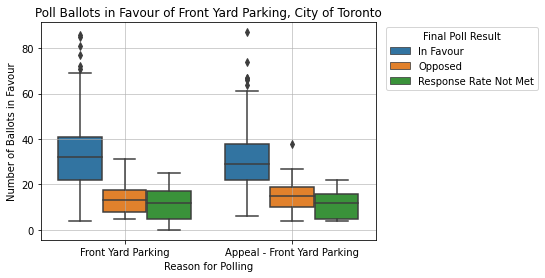

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns  # am using sns as it is best with my data. Still need matplotlib
import numpy as np
import pandas as pd

ax = sns.boxplot(x='APPLICATION_FOR', y ='BALLOTS_IN_FAVOUR', data = frontyarddf, 
            hue = 'POLL_RESULT' )
ax.set(xlabel='Reason for Polling', ylabel='Number of Ballots in Favour')
ax.legend(bbox_to_anchor=(1.5, 1),title=("Final Poll Result"))
ax.grid(alpha=.75)
plt.title('Poll Ballots in Favour of Front Yard Parking, City of Toronto')
plt.show()